In [44]:
import os
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
print(os.getcwd())

C:\development\git\CAS-Applied-Data-Science\Module6_Deep_Learning


In [3]:
from ultralytics import YOLO
#pip install -U ultralytics

In [4]:
dataPath = '../Module6_Deep_Learning/YoloTrainingPath.yaml'

In [5]:
#yolo task=detect \
#mode=train \
#model=yolov8s.pt \
#data={dataset.location}/data.yaml \
#epochs=100 \
#imgsz=640

model = YOLO('yolov8n.pt')
results = model.train(data = dataPath, epochs = 20)

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.2.0+cu121 CPU (11th Gen Intel Core(TM) i7-1185G7 3.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../Module6_Deep_Learning/YoloTrainingPath.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning C:\Development\git\CAS-Applied-Data-Science\final_project\Data\Try_EVN_1200x900\labels.cache... 677 ima
val: Scanning C:\Development\git\CAS-Applied-Data-Science\final_project\Data\Try_EVN_1200x900\labels.cache... 677 image


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.451      6.293      1.959         14        640: 100%|██████████| 43/43 [04:20<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:31

                   all        677        735     0.0271       0.16     0.0624     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.788      3.846      1.409         10        640: 100%|██████████| 43/43 [04:54<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:37

                   all        677        735      0.765      0.136      0.233      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.568      3.011      1.297         23        640:  67%|██████▋   | 29/43 [03:27<01:40,  7.


KeyboardInterrupt: 

In [ ]:
from utils.plots import plot_results

plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'

In [41]:
pathBestWeights = 'runs/detect/train6/weights/best.pt'
model = YOLO(pathBestWeights)

In [42]:
img = "C:/Development/git/"
results = model(img)


image 1/23 C:\Development\git\1.jpg: 256x320 1 EVN_H, 52.2ms
image 2/23 C:\Development\git\10.jpg: 256x320 1 EVN_V, 48.7ms
image 3/23 C:\Development\git\11.jpg: 256x320 1 EVN_H, 47.1ms
image 4/23 C:\Development\git\12.jpg: 256x320 1 EVN_H, 51.6ms
image 5/23 C:\Development\git\13.jpg: 256x320 1 EVN_H, 49.2ms
image 6/23 C:\Development\git\14.jpg: 256x320 1 EVN_H, 42.5ms
image 7/23 C:\Development\git\15.jpg: 256x320 1 EVN_H, 42.1ms
image 8/23 C:\Development\git\16.jpg: 256x320 1 EVN_V, 43.7ms
image 9/23 C:\Development\git\17.jpg: 256x320 1 EVN_H, 41.3ms
image 10/23 C:\Development\git\18.jpg: 256x320 1 EVN_H, 41.3ms
image 11/23 C:\Development\git\19.jpg: 256x320 1 EVN_H, 30.0ms
image 12/23 C:\Development\git\2.jpg: 256x320 2 EVN_Hs, 30.1ms
image 13/23 C:\Development\git\20.jpg: 256x320 1 EVN_H, 28.0ms
image 14/23 C:\Development\git\21.jpg: 256x320 1 EVN_H, 32.0ms
image 15/23 C:\Development\git\22.jpg: 256x320 (no detections), 28.0ms
image 16/23 C:\Development\git\3.jpg: 256x320 1 EVN_V, 3

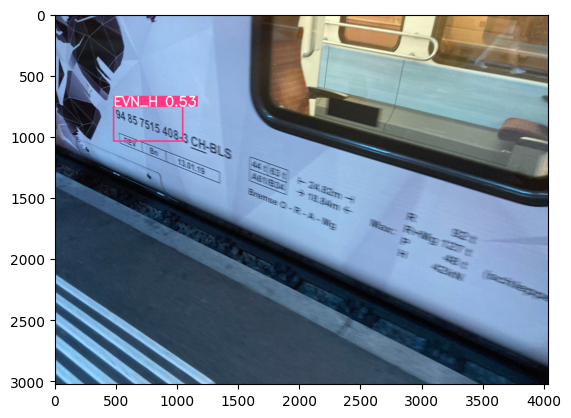

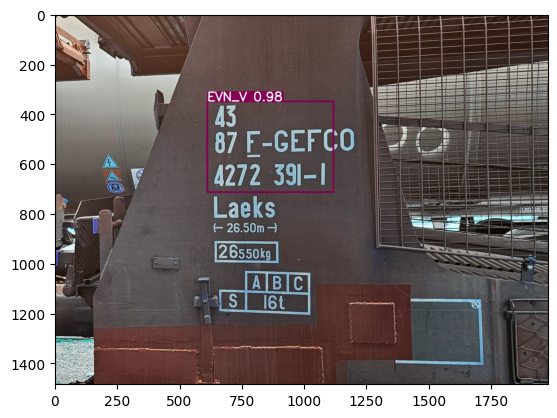

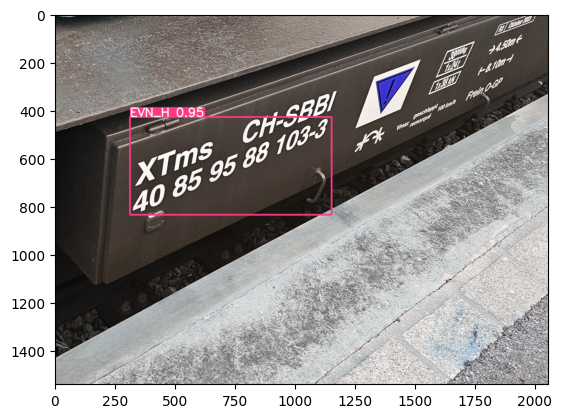

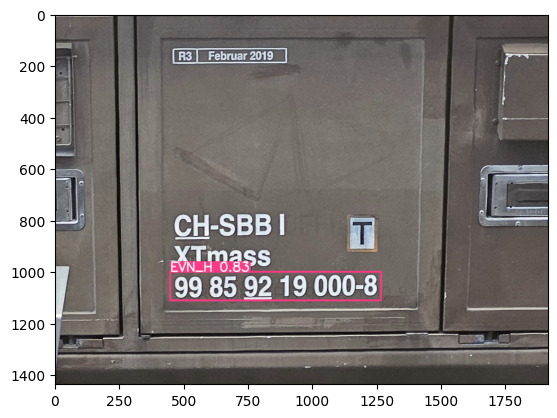

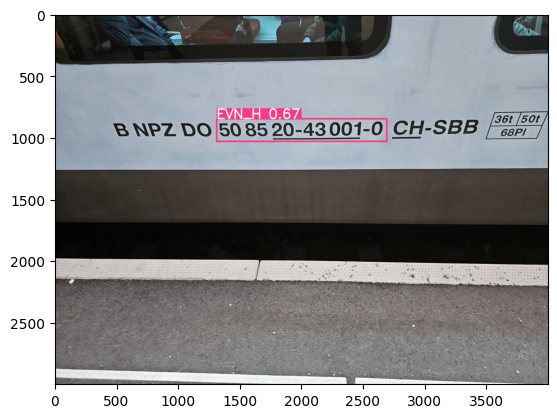

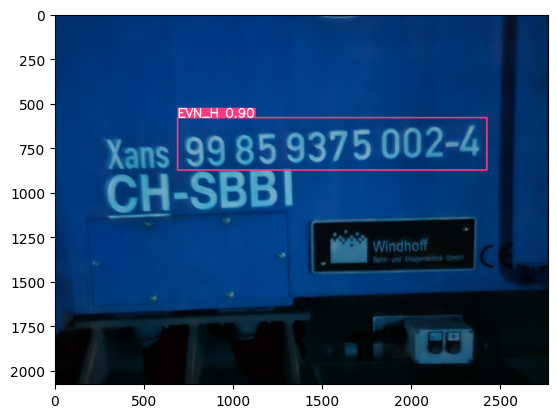

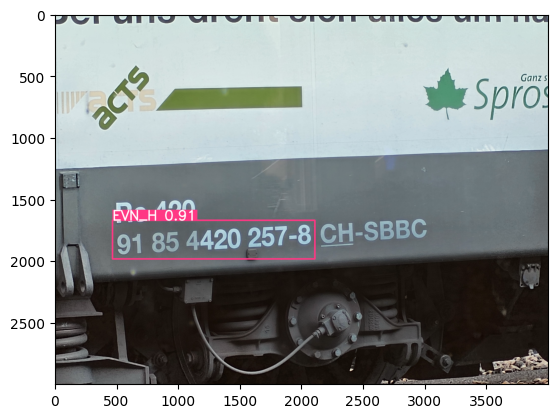

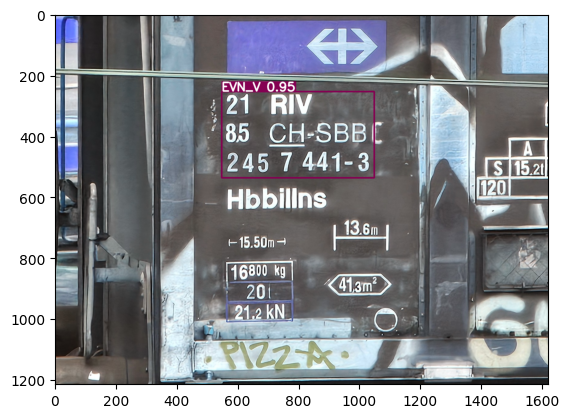

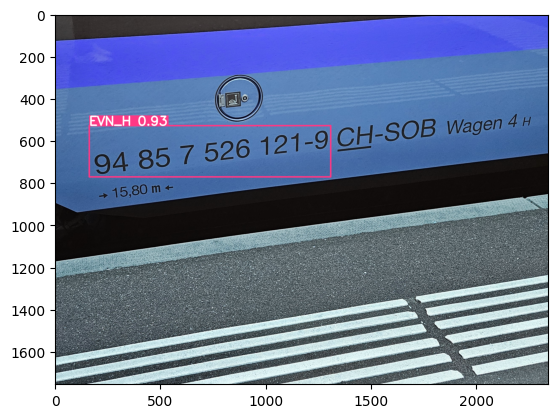

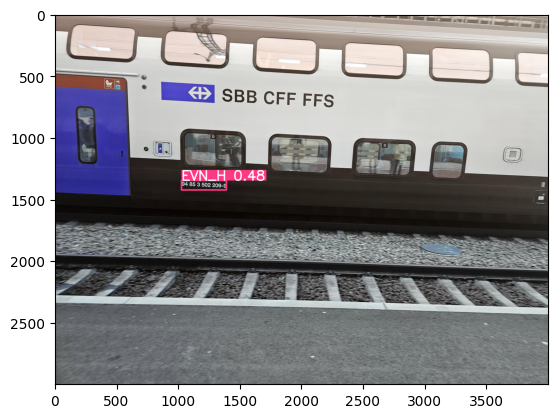

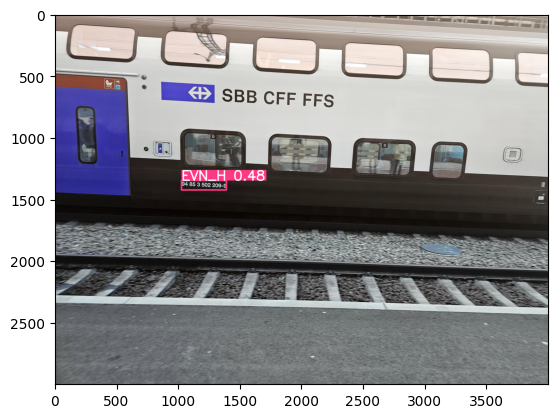

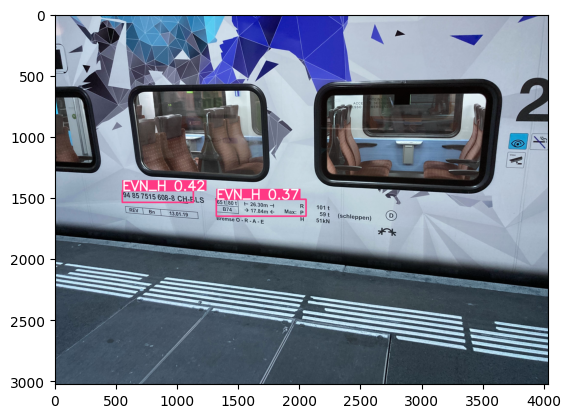

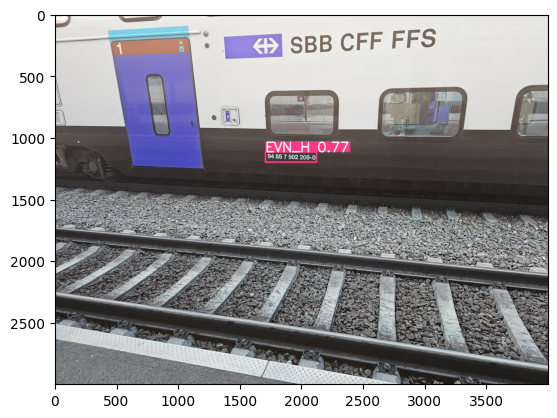

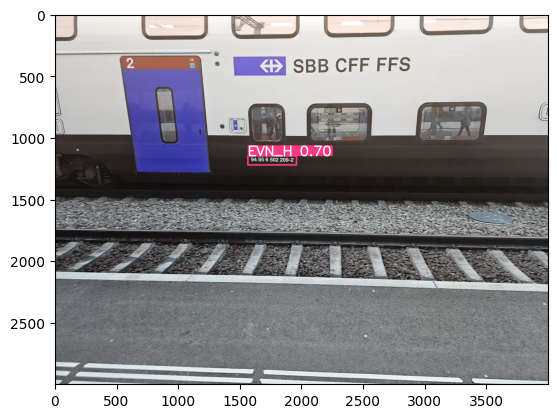

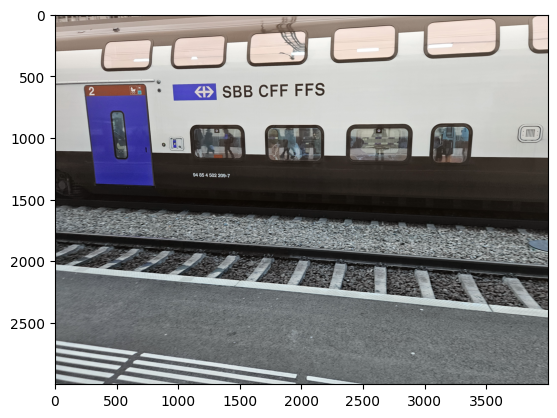

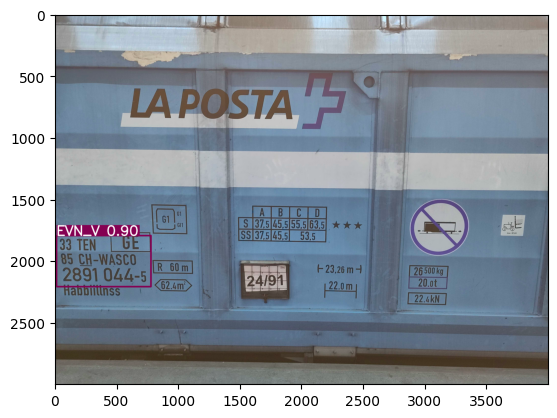

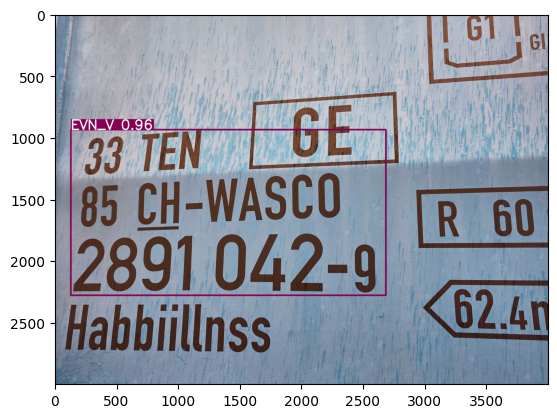

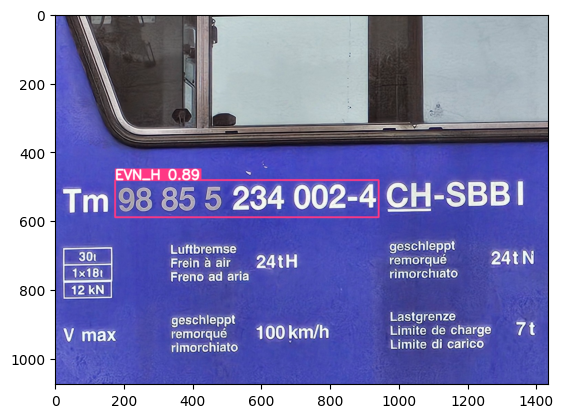

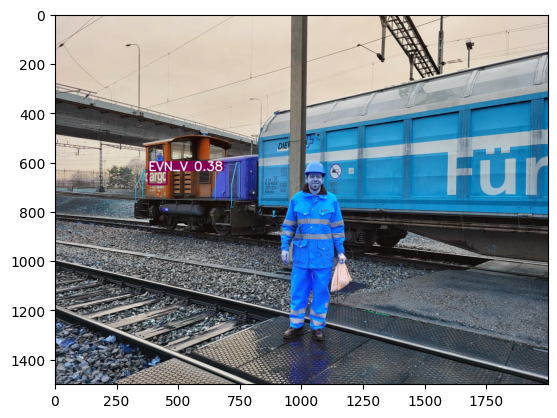

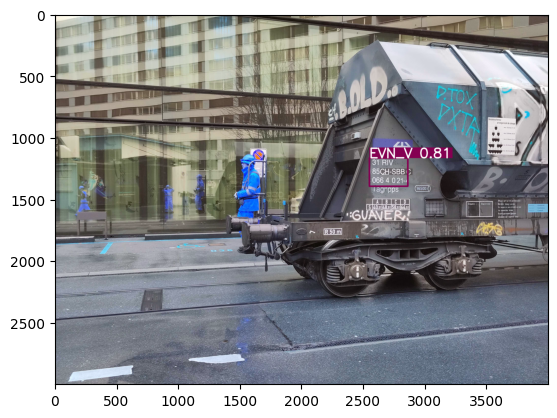

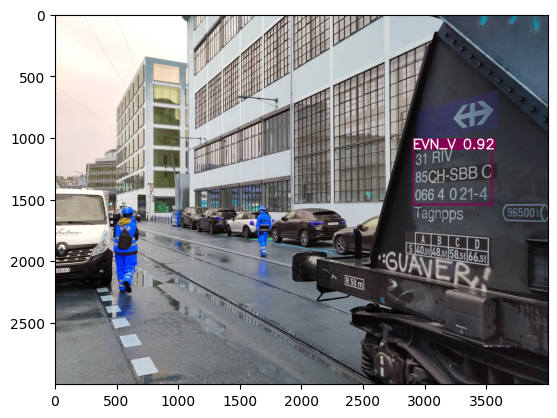

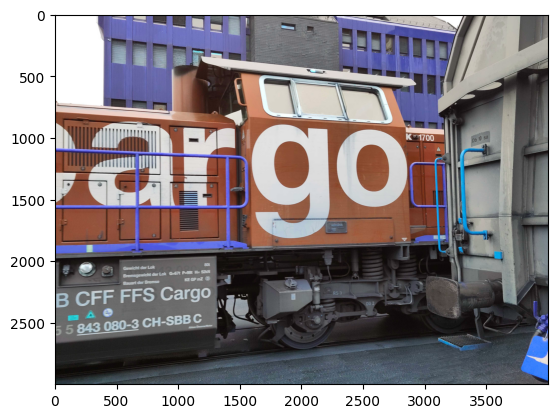

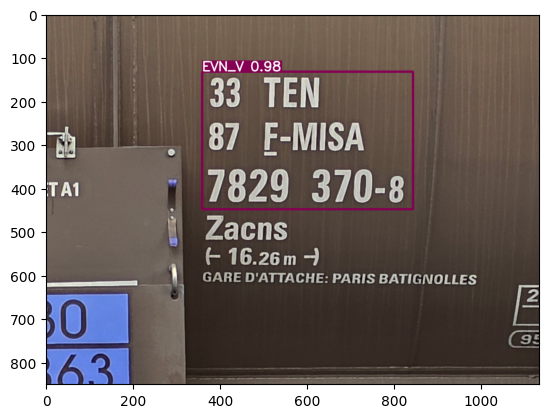

In [43]:
%matplotlib inline 
#plt.imshow(np.squeeze(results[0].plot()))

for r in results:
    plt.imshow(np.squeeze(r.plot()))
    plt.show()

In [54]:
#Webcam Render
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    for r in results:
        cv2.imshow('YOLO', np.squeeze(r.plot()))
    
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


0: 256x320 (no detections), 48.0ms
Speed: 12.0ms preprocess, 48.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 36.5ms
Speed: 0.0ms preprocess, 36.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 36.1ms
Speed: 0.0ms preprocess, 36.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 36.1ms
Speed: 0.0ms preprocess, 36.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 37.1ms
Speed: 0.0ms preprocess, 37.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 34.0ms
Speed: 2.5ms preprocess, 34.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 40.1ms
Speed: 0.0ms preprocess, 40.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 36.0ms
Speed: 0.0ms preprocess, 36.0ms 


0: 256x320 (no detections), 36.1ms
Speed: 0.0ms preprocess, 36.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 36.0ms
Speed: 0.0ms preprocess, 36.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 33.0ms
Speed: 0.0ms preprocess, 33.0ms inference, 3.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 36.1ms
Speed: 0.0ms preprocess, 36.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 24.0ms
Speed: 0.0ms preprocess, 24.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 24.0ms
Speed: 0.0ms preprocess, 24.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 36.5ms
Speed: 0.0ms preprocess, 36.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 24.0ms
Speed: 0.0ms preprocess, 24.0ms i

In [60]:
VideoPath = 'C:/Development/git/CAS-Applied-Data-Science/final_project/Data/EVN_Wagen_Video_Original/20240302_163609.mp4'
cap = cv2.VideoCapture(VideoPath)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    for r in results:
        cv2.imshow('YOLO', np.squeeze(r.plot()))
    
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


0: 192x320 2 EVN_Vs, 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 49.8ms
Speed: 0.0ms preprocess, 49.8ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 EVN_Vs, 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 4 EVN_Vs, 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 39.4ms
Speed: 0.0ms preprocess, 39.4ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 0.0ms postprocess per image at shape (1, 3,


0: 192x320 (no detections), 32.0ms
Speed: 0.0ms preprocess, 32.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 33.0ms
Speed: 0.0ms preprocess, 33.0ms inference, 8.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 39.8ms
Speed: 0.0ms preprocess, 39.8ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 36.1ms
Speed: 0.0ms preprocess, 36.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 30.0ms
Speed: 0.0ms preprocess, 30.0ms i


0: 192x320 (no detections), 39.5ms
Speed: 0.0ms preprocess, 39.5ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.1ms
Speed: 0.0ms preprocess, 40.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 38.6ms
Speed: 0.0ms preprocess, 38.6ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 31.5ms
Speed: 0.0ms preprocess, 31.5ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 39.1ms
Speed: 0.0ms preprocess, 39.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.1ms
Speed: 0.0ms preprocess, 40.1ms i


0: 192x320 (no detections), 41.1ms
Speed: 0.0ms preprocess, 41.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 43.1ms
Speed: 0.0ms preprocess, 43.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 30.0ms
Speed: 0.0ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 45.2ms
Speed: 0.0ms preprocess, 45.2ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 54.2ms
Speed: 1.2ms preprocess, 54.2ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.1ms
Speed: 0.0ms preprocess, 40.1ms i


0: 192x320 1 EVN_H, 30.0ms
Speed: 0.0ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 41.1ms
Speed: 0.0ms preprocess, 41.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 30.1ms
Speed: 0.0ms preprocess, 30.1ms inference, 10.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 40.6ms
Speed: 0.0ms preprocess, 40.6ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 35.5ms
Speed: 0.0ms preprocess, 35.5ms inference, 0.0ms

Speed: 6.5ms preprocess, 33.5ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 30.0ms
Speed: 0.0ms preprocess, 30.0ms inference, 10.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 40.1ms
Speed: 0.0ms preprocess, 40.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 30.0ms
Speed: 0.0ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 30.0ms
Speed: 0.0ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 39.5ms


0: 192x320 1 EVN_V, 40.5ms
Speed: 0.0ms preprocess, 40.5ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 39.1ms
Speed: 0.0ms preprocess, 39.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 EVN_Vs, 40.6ms
Speed: 0.0ms preprocess, 40.6ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 EVN_Vs, 40.8ms
Speed: 0.0ms preprocess, 40.8ms inference, 10.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 EVN_Vs, 40.7ms
Speed: 0.0ms preprocess, 40.7ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 EVN_Vs, 40.2ms
Speed: 0.0ms preprocess, 40.2ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 EVN_V, 40.3ms
Speed: 0.0ms preprocess, 40.3ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 

WARNING ⚠️ 'source' is missing. Using 'source=C:\Development\Anaconda3\envs\CASDataScience\Lib\site-packages\ultralytics\assets'.

image 1/2 C:\Development\Anaconda3\envs\CASDataScience\Lib\site-packages\ultralytics\assets\bus.jpg: 320x256 (no detections), 42.2ms
image 2/2 C:\Development\Anaconda3\envs\CASDataScience\Lib\site-packages\ultralytics\assets\zidane.jpg: 192x320 (no detections), 40.0ms
Speed: 0.0ms preprocess, 41.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)
WARNING ⚠️ 'source' is missing. Using 'source=C:\Development\Anaconda3\envs\CASDataScience\Lib\site-packages\ultralytics\assets'.

image 1/2 C:\Development\Anaconda3\envs\CASDataScience\Lib\site-packages\ultralytics\assets\bus.jpg: 320x256 (no detections), 48.1ms
image 2/2 C:\Development\Anaconda3\envs\CASDataScience\Lib\site-packages\ultralytics\assets\zidane.jpg: 192x320 (no detections), 40.7ms
Speed: 0.0ms preprocess, 44.4ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)
WARNIN